<a href="https://colab.research.google.com/github/henomoto1025/synthetic-data-notebooks/blob/main/SDV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## インストール

In [1]:
!pip install sdv

  Using cached sdv-1.14.0-py3-none-any.whl (145 kB)
  Using cached boto3-1.34.131-py3-none-any.whl (139 kB)
  Using cached botocore-1.34.131-py3-none-any.whl (12.3 MB)
  Using cached copulas-0.11.0-py3-none-any.whl (51 kB)
  Using cached ctgan-0.10.1-py3-none-any.whl (24 kB)
  Using cached deepecho-0.6.0-py3-none-any.whl (27 kB)
  Using cached rdt-1.12.1-py3-none-any.whl (63 kB)
  Using cached sdmetrics-0.14.1-py3-none-any.whl (169 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached s3transfer-0.10.1-py3-none-any.whl (82 kB)
  Using cached Faker-25.9.1-py3-none-any.whl (1.8 MB)
  Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl

## 学習元データの読み込み

In [2]:
import pandas as pd

csv_url = "https://huggingface.co/datasets/inria-soda/tabular-benchmark/raw/main/reg_num/wine_quality.csv"
df_real = pd.read_csv(csv_url)
df_real

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## 前処理（メタデータ作成）

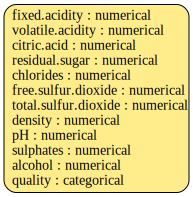

In [3]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_real)
metadata.visualize()

## CTGANの学習

In [4]:
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer

synthesizer = CTGANSynthesizer(metadata, verbose=True)
synthesizer.fit(df_real)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:84: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-2.69) | Discrim. (-0.00): 100%|██████████| 300/300 [07:16<00:00,  1.46s/it]


## 合成データの生成

In [5]:
df_fake = synthesizer.sample(len(df_real))
df_fake

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,9.06,0.223,0.30,1.28,0.080,18.9,43.0,0.992650,3.16,0.77,11.133720,4
1,7.25,0.276,0.16,2.03,0.048,26.9,187.5,0.995984,3.25,0.44,11.787042,6
2,5.55,0.390,0.30,11.49,0.048,15.6,168.4,0.997812,3.57,0.51,10.716808,7
3,6.62,0.284,0.48,7.66,0.053,15.6,159.9,1.000545,3.06,0.42,9.112615,5
4,6.45,0.407,0.44,1.20,0.090,15.5,57.4,0.992227,3.35,0.59,10.385953,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,10.79,0.623,0.53,1.16,0.085,4.9,28.7,0.995819,3.35,0.54,10.820859,4
6493,6.59,0.284,0.31,2.95,0.055,16.1,249.0,1.003831,3.04,0.58,8.970320,5
6494,6.68,0.291,0.27,7.13,0.040,35.0,104.8,0.994354,3.21,0.53,12.945887,7
6495,8.20,0.276,0.27,1.18,0.017,5.3,161.8,0.990545,3.35,0.37,9.703487,7


## 合成データの評価

In [6]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=df_real,
    synthetic_data=df_fake,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 12/12 [00:00<00:00, 189.21it/s]|
Column Shapes Score: 88.35%

(2/2) Evaluating Column Pair Trends: |██████████| 66/66 [00:01<00:00, 55.33it/s]|
Column Pair Trends Score: 85.63%

Overall Score (Average): 86.99%



## 評価の視覚化

In [7]:
quality_report.get_visualization("Column Pair Trends")

In [8]:
quality_report.get_visualization("Column Shapes")

In [9]:
from sdmetrics.visualization import get_column_plot

for col in df_real.columns:
    if metadata.columns[col]["sdtype"] == "categorical":
        fig = get_column_plot(
            df_real,
            df_fake,
            col,
            plot_type="bar",
        )
    else:
        fig = get_column_plot(
            df_real,
            df_fake,
            col,
            plot_type="distplot"
        )
    fig.show()